In [ ]:
data_path = "/content/Crop_recommendation.csv"

import pandas as pd

data = pd.read_csv(data_path)
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

as we notce over here there is one catigorical column which is "label" , so we are going to explore it's unique values .

In [ ]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
data.nunique() 

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

there are 100 value for every item in the label column which represents a sample that contains:


N - ratio of Nitrogen content in soil

P - ratio of Phosphorous content in soil

K - ratio of Potassium content in soil

temperature - temperature in degree Celsius

ph - ph value of the soil

humidity - relative humidity in %

rainfall - rainfall in mm

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


# pivot table

will help us to determine the average of every single crop property . 

In [ ]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [ ]:
crop_summary = crop_summary.reindex(crop_summary.sort_values(by=['temperature'],ascending=False).index)

In [ ]:
crop_summary.style.format({'K':'%{0:,.0f}',
                   'N':'%{0:,.0f}',
                   'P':'%{0:,.0f}',
                   'humidity':'%{0:,.0f}',
                   'ph':'%{0:,.0f}',
                   'rainfall':'%{0:,.0f}',
                   'temperature':'°C{0:,.0f}'}).bar(color='#d65f5f')

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
papaya,%50,%50,%59,%92,%7,%143,°C34
mango,%30,%20,%27,%50,%6,%95,°C31
blackgram,%19,%40,%67,%65,%7,%68,°C30
muskmelon,%50,%100,%18,%92,%6,%25,°C29
mungbean,%20,%21,%47,%85,%7,%48,°C29
mothbeans,%20,%21,%48,%53,%7,%51,°C28
pigeonpeas,%20,%21,%68,%48,%6,%149,°C28
coconut,%31,%22,%17,%95,%6,%176,°C27
banana,%50,%100,%82,%80,%6,%105,°C27


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



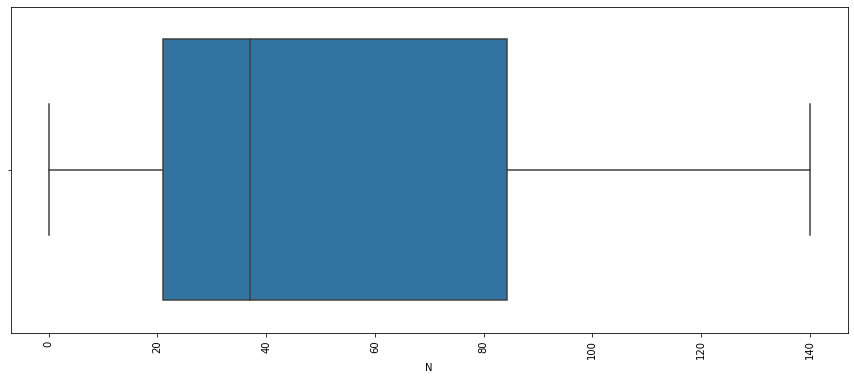

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



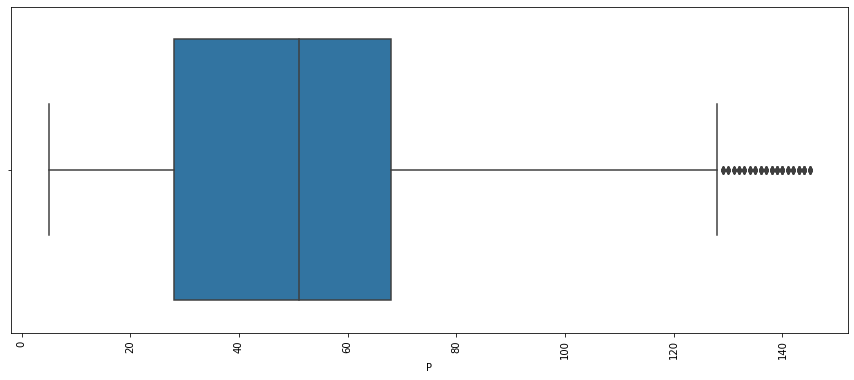

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



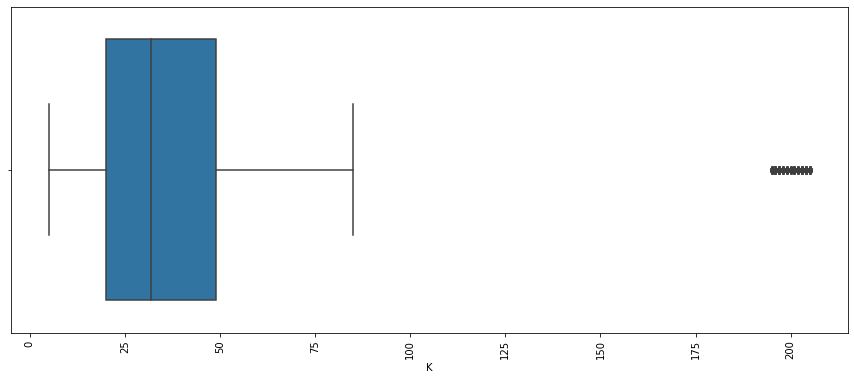

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



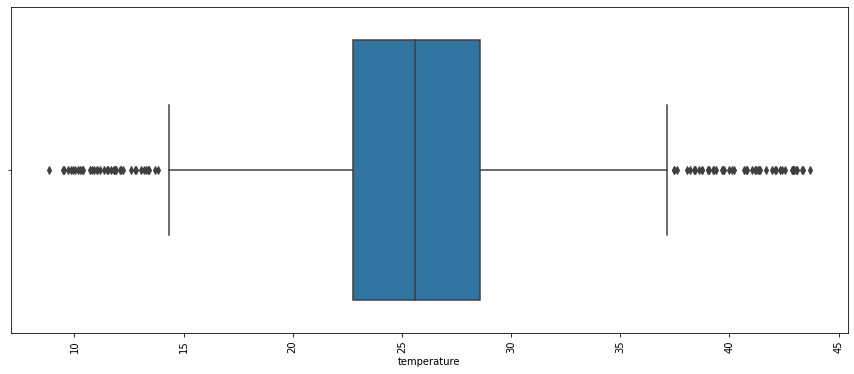

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



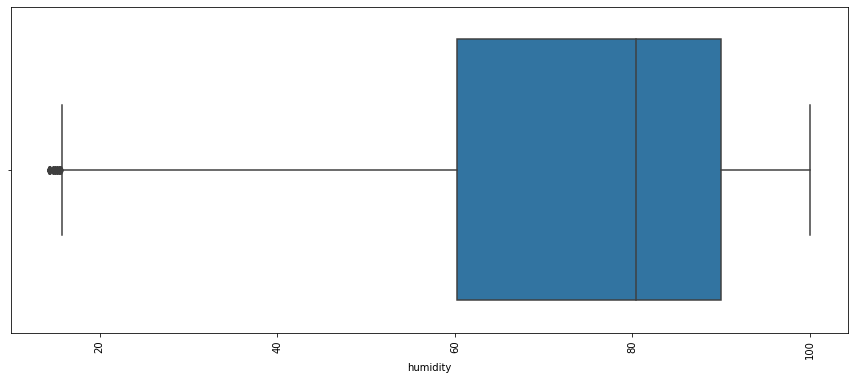

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



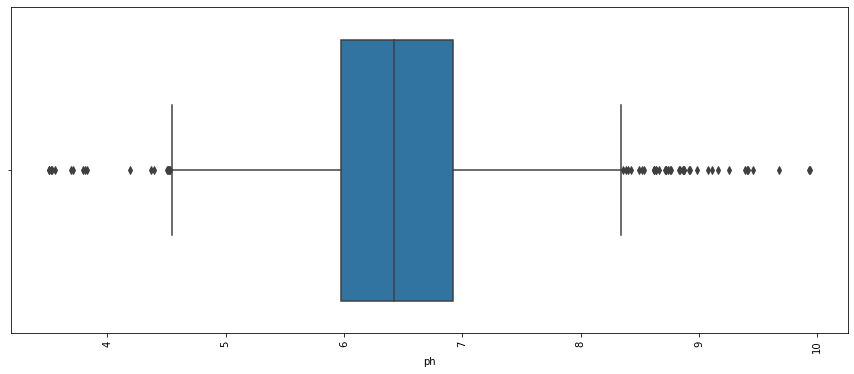

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



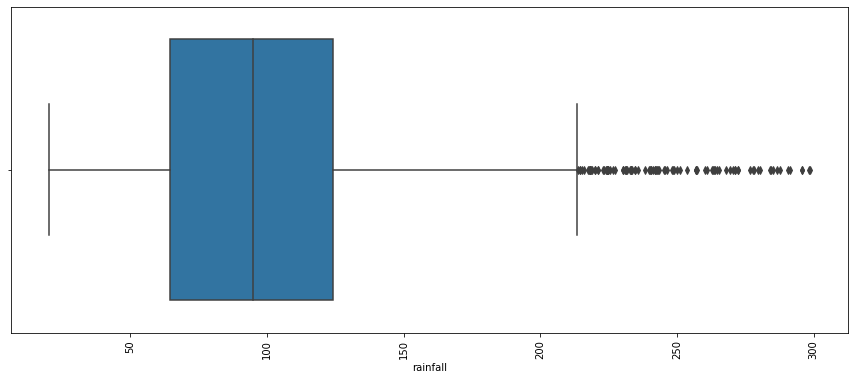

In [ ]:
data1=data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data1[i])
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
import numpy as np

print(np.where(data['rainfall']>220))

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   15,   16,   18,   19,   21,   23,   24,   25,   26,   27,
         28,   30,   32,   33,   34,   36,   37,   38,   39,   40,   43,
         44,   47,   49,   53,   54,   55,   57,   59,   60,   61,   62,
         64,   67,   68,   69,   71,   72,   74,   75,   76,   82,   84,
         85,   86,   88,   89,   90,   91,   93,   94,   96,   97, 1700,
       1703, 1712, 1723, 1726, 1758, 1759, 1778, 1783, 1784, 1787, 1793,
       1797, 1800, 1801, 1849, 1859, 1865, 1881, 1892, 1894]),)


In [ ]:
Q1=np.percentile(data['rainfall'],25,interpolation='midpoint')
Q3=np.percentile(data['rainfall'],75,interpolation='midpoint')
IQR=Q3-Q1

upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [ ]:
print(data['rainfall']>upper_bound)

0       False
1        True
2        True
3        True
4        True
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: rainfall, Length: 2200, dtype: bool


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
fig1= px.bar(data,x='label',y='N')
fig1.show()

In [ ]:
import random
from IPython.core.display import update_display

In [ ]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008','#9acd32','#Eedc82','E4d96f',
            '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064','#E75480','#Ffb6c1','#E5e42',
            '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [ ]:
crop_summary_N=crop_summary.sort_values(by='N',
                                        ascending=False)

fig=make_subplots(rows=1,cols=2)          # arranging them in 1 row and 2 coloumns by taking dictionary

top = {
    'y': crop_summary_N['N'][0:10].sort_values().index,
    'x': crop_summary_N['N'][0:10].sort_values() 
}
last={
    'y': crop_summary_N['N'][-10:].index,
    'x': crop_summary_N['N'][-10:] 
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
         text=top['x']),

    row=1,col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1,col=2
)
fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title_text="nitrogen(N)", # text title
                plot_bgcolor='white', # background color
                font_size=10,  #font size
                font_color='black',#FONT COLOR
                height=500)

fig.update_xaxes(showgrid=False )
fig.update_yaxes(showgrid=False )
fig.show()

In [ ]:
crop_summary_K=crop_summary.sort_values(by='K',
                                        ascending=False)

fig=make_subplots(rows=1,cols=2)          # arranging them in 1 row and 2 coloumns by taking dictionary

top = {
    'y': crop_summary_K['K'][0:10].sort_values().index,
    'x': crop_summary_K['K'][0:10].sort_values() 
}
last={
    'y': crop_summary_K['K'][-10:].index,
    'x': crop_summary_K['K'][-10:] 
}
fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
         text=top['x']),

    row=1,col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1,col=2
)
fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title_text="potassium(K)", # text title
                plot_bgcolor='white', # background color
                font_size=10,  #font size
                font_color='black',#FONT COLOR
                height=500)

fig.update_xaxes(showgrid=False )
fig.update_yaxes(showgrid=False )
fig.show()

In [ ]:
crop_summary_K=crop_summary.sort_values(by='P',
                                        ascending=False)

fig=make_subplots(rows=1,cols=2)          # arranging them in 1 row and 2 coloumns by taking dictionary

top = {
    'y': crop_summary_K['P'][0:10].sort_values().index,
    'x': crop_summary_K['P'][0:10].sort_values() 
}
last={
    'y': crop_summary_K['P'][-10:].index,
    'x': crop_summary_K['P'][-10:] 
}
fig.add_trace(
    go.Bar(top,
           name="Most Phosphorous required",
           marker_color=random.choice(colorarr),
           orientation='h',
         text=top['x']),

    row=1,col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least Phosphorous  required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1,col=2
)
fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title_text="Phosphorous (P)", # text title
                plot_bgcolor='white', # background color
                font_size=10,  #font size
                font_color='black',#FONT COLOR
                height=500)

fig.update_xaxes(showgrid=False )
fig.update_yaxes(showgrid=False )
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['N'],
name='Nitrogen',
marker_color='indianred'
))
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['P'],
name='Phosphorous',
marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['K'],
name='Potassium',
marker_color='crimson'
))
fig.update_layout(title="N, P, K values comparision between crops",
plot_bgcolor='white',
barmode='group',
xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['humidity'],
name='humidity',
marker_color=random.choice(colorarr)
))
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['ph'],
name='ph',
marker_color=random.choice(colorarr)
))
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['rainfall'],
name='rainfall ',
marker_color=random.choice(colorarr)
))
fig.update_layout(title="humidity , ph , rainfall values comparision between crops",
plot_bgcolor='white',
barmode='group',
xaxis_tickangle=-45)
fig.show()

In [ ]:
crop_scatter=data[(data['label']=='rice') |
                (data['label']=='jute') |
                (data['label']=='cotton') |
                (data['label']=='maize') |
                (data['label']=='lentil') ]
fig=px.scatter(crop_scatter,x="temperature",y="humidity",color="label",symbol="label")
fig.update_layout(plot_bgcolor='pink')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

None


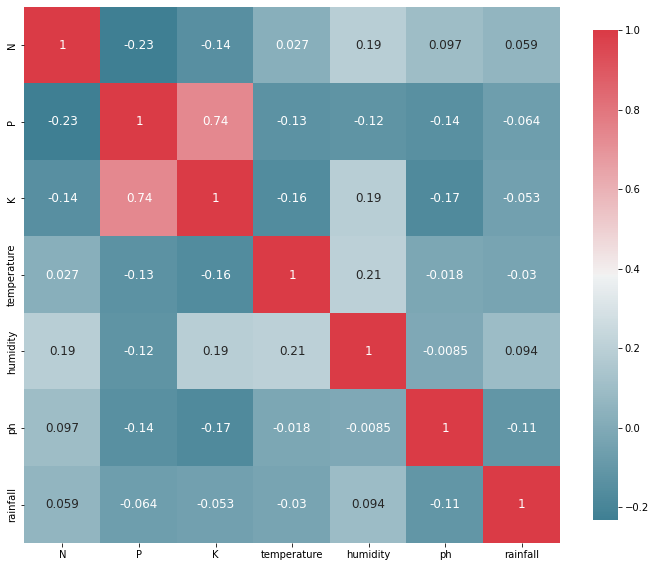

In [ ]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
print(plot_correlation_map(data))

if we looked over here we will notice the connection between each cell in this matrix and its variables :)

for Example :

. there is a strongly correlation between "Phosphorous " and "Potassium ".


. the same happens with "temperature" and "humidity".

In [ ]:
X=data.drop('label',axis=1)
y=data['label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               shuffle=True,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [ ]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  

Accuracy: 0.9931129476584022
